In [3]:
from google.colab import drive
import glob
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# IMPORT NECESSARY LIBRARIES
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, Model, optimizers
from random import randint
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot
from tensorflow.keras.utils  import to_categorical



In [34]:
angry = glob.glob('/content/drive/MyDrive/speech_emotion_recognition/images/original/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/speech_emotion_recognition/images/original/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/speech_emotion_recognition/images/original/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/speech_emotion_recognition/images/original/fearful/*.*')
happy = glob.glob('/content/drive/MyDrive/speech_emotion_recognition/images/original/happy/*.*')
neutral = glob.glob('/content/drive/MyDrive/speech_emotion_recognition/images/original/neutral/*.*')
sad = glob.glob('/content/drive/MyDrive/speech_emotion_recognition/images/original/sad/*.*')
surprised = glob.glob('/content/drive/MyDrive/speech_emotion_recognition/images/original/surprised/*.*')

In [35]:
data = []
labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Surprised')
data = np.array(data)
labels = np.array(labels)


In [ ]:
encoder = OneHotEncoder()
labels = encoder.fit_transform(np.array(labels).reshape(-1,1)).toarray()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=22, test_size=0.2, shuffle=True)

In [37]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [38]:
lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [39]:
print(X_train.shape)
print(X_test.shape)

(1152, 224, 224, 3)
(288, 224, 224, 3)


In [40]:
print(y_train.shape)
print(y_test.shape)

(1152, 8)
(288, 8)


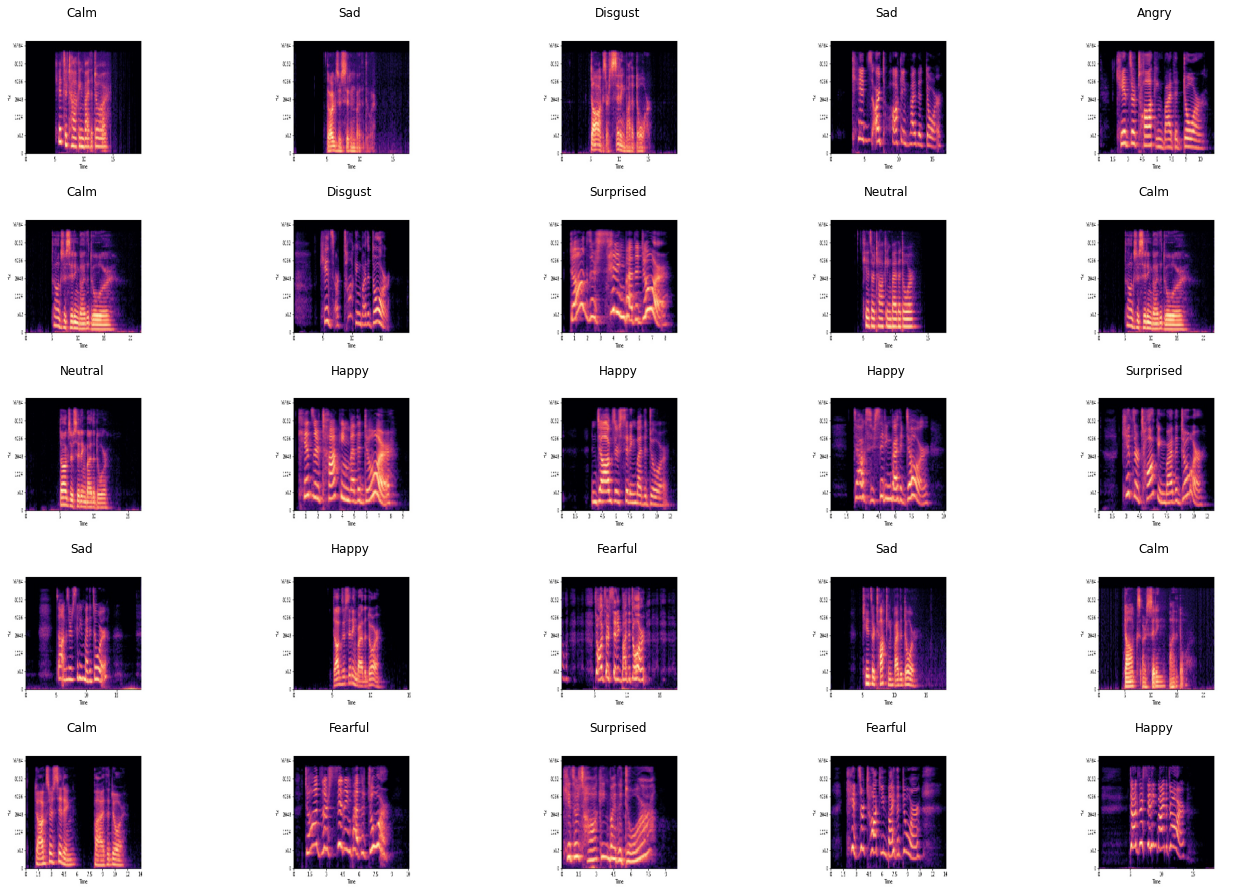

In [43]:
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(data))
        ax[i,j].imshow(data[rnd_number])
        ax[i,j].set_title(get_classlabel(labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout

cnn = keras.Sequential()
cnn.add(Conv2D(128,(5,5),activation='relu',input_shape=(224,224,3)))
cnn.add(MaxPooling2D((3,3)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(128,(5,5),activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(MaxPooling2D((3,3)))
cnn.add(Conv2D(64,(5,5),activation='relu'))
cnn.add(MaxPooling2D((3,3)))
cnn.add(Dropout(0.4))

cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(8,activation='softmax'))

cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 128)     9728      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 73, 73, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 69, 69, 128)       409728    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 64)       

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history=cnn.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/50
16/16 [==============================] - 29s 791ms/step - loss: 2.1744 - accuracy: 0.1498 - val_loss: 2.0853 - val_accuracy: 0.1343 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 7s 437ms/step - loss: 2.0486 - accuracy: 0.2034 - val_loss: 2.0238 - val_accuracy: 0.1690 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 7s 435ms/step - loss: 1.9969 - accuracy: 0.1786 - val_loss: 1.9870 - val_accuracy: 0.2083 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 7s 435ms/step - loss: 1.9776 - accuracy: 0.2262 - val_loss: 1.9702 - val_accuracy: 0.2014 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 7s 436ms/step - loss: 1.9600 - accuracy: 0.2242 - val_loss: 1.9557 - val_accuracy: 0.2292 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 7s 435ms/step - loss: 1.9590 - accuracy: 0.2163 - val_loss: 1.9431 - val_accuracy: 0.2060 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 7s 437ms/step - l

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# VGG16 Fine Tuning With Image Augmentation

In [44]:
#The goal of this image classification challenge is to train a model that can correctly classify an input image into 1,000 separate object categories.
from keras.applications.vgg16 import VGG16

vgg16_model = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

In [45]:
for layer in vgg16_model.layers[:15]:
    layer.trainable = False

In [46]:
x = vgg16_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg16_model.input, outputs=x)

In [47]:
for i, layer in enumerate(vgg16_model.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [48]:
# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('vgg16_augment.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [49]:
train_datagen = ImageDataGenerator(zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)

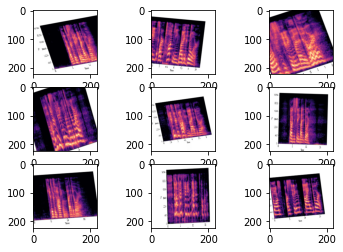

In [50]:
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate), metrics=["accuracy"])

history = transfer_model.fit(train_generator,
                    # steps_per_epoch=10,
                    validation_data=(X_test,y_test),
                    # validation_steps=20,
                    epochs=80,
                    callbacks=[lr_reduce,checkpoint])
                    # shuffle=True)

Epoch 1/80
1152/1152 [==============================] - ETA: 0s - loss: 2.0265 - accuracy: 0.1970
Epoch 00001: val_accuracy improved from -inf to 0.29514, saving model to vgg16_augment.h15
INFO:tensorflow:Assets written to: vgg16_augment.h15/assets
1152/1152 [==============================] - 29s 24ms/step - loss: 2.0265 - accuracy: 0.1970 - val_loss: 1.7955 - val_accuracy: 0.2951 - lr: 5.0000e-05
Epoch 2/80
1152/1152 [==============================] - ETA: 0s - loss: 1.7452 - accuracy: 0.3411
Epoch 00002: val_accuracy improved from 0.29514 to 0.42361, saving model to vgg16_augment.h15
INFO:tensorflow:Assets written to: vgg16_augment.h15/assets
1152/1152 [==============================] - 27s 23ms/step - loss: 1.7452 - accuracy: 0.3411 - val_loss: 1.5830 - val_accuracy: 0.4236 - lr: 5.0000e-05
Epoch 3/80
1152/1152 [==============================] - ETA: 0s - loss: 1.5917 - accuracy: 0.3976
Epoch 00003: val_accuracy improved from 0.42361 to 0.43056, saving model to vgg16_augment.h15
INF

In [ ]:
transfer_model.save_weights("models/vgg16_weights.h5")
transfer_model.save('models/vgg16_model.h5')
print("Saved model to disk")

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('vgg16_Model_Accuracy.png')
plt.show()

NameError: ignored

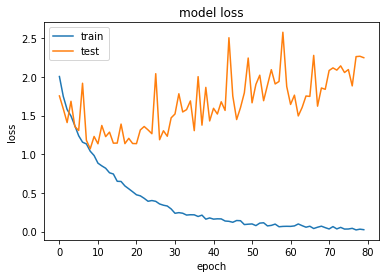

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('vgg16_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

# VGG19 Fine Tuning + Augmentation

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19

vgg19_model = vgg19.VGG19(weights='imagenet', pooling='avg', include_top=False, input_shape = (224, 224, 3))

In [ ]:
#Image Data Augmentation
train_datagen = ImageDataGenerator(
                                    zoom_range=0.5,
                                   rotation_range=20,
                                   width_shift_range=0.5)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=16)

lr_reduce = ReduceLROnPlateau(monitor='val_acc', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("vgg19_augment.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)



In [ ]:
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [ ]:
for layer in vgg19_model.layers[:12]:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(vgg19_model.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
input_shape=(224,224,3)

model=models.Sequential()
model.add(vgg19_model)
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(8,activation='softmax'))
model.summary()

from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])




In [ ]:
epochs = 70
history = model.fit(train_generator,
                              epochs = epochs, 
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = (X_test,y_test), 
                              callbacks=[checkpoint,lr_reduce], 
                              verbose = 1,
                              shuffle=True
                              )

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

In [ ]:
transfer_model.save_weights("vgg19_weights.h5")
transfer_model.save('vgg19_model.h5')
print("Saved model to disk")